# Building Dashboards with `Plotly` and `Dash`
## Day06

### CS66: Introduction to Computer Science II | Fall 2024

Tuesday, September 17th, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# References for this lecture

Requests module user's guide: [https://docs.python-requests.org/en/latest/](https://docs.python-requests.org/en/latest/)

Plotly graphing library: [https://plotly.com/python/](https://plotly.com/python/)

Dash a low-code framework for rapidly building data apps in Python [https://dash.plotly.com/](https://dash.plotly.com/)

## You should be working on:
- [Assignment #3](https://analytics.drake.edu/~moore/CS66-F24/Assignment3.html), due Tuesday (9/17) by 11:59 pm
> submit to CodePost
- [Assignment #4](https://analytics.drake.edu/~moore/CS66-F24/Assignment4.html), due Tuesday (9/24) by 11:59

# Install `plotly` and `dash`

Open up a terminal in VS Code, and install `plotly` and `dash`.

```bash
pip install plotly
pip install dash
```

Depending on how Python is installed on your machine, these commands might change a little bit. 
For example, it might be:
`python3 -m pip install dash`
`pip3 install plotly`

I'll come around and help.

# A new API
Today, we'll be working with PokeAPI, an API to access any data you want to know about Pokemon. 

[https://pokeapi.co](https://pokeapi.co)


# Group Exercise #1:

Before coding, take a few minutes to explore the PokeAPI. 

You can fetch data for any Pokemon by making a GET request to the following URL:

`https://pokeapi.co/api/v2/pokemon/{id or name}/`

Try making a request to get data about your favorite pokemon (if you don't have one, feel free to borrow mine... Charizard)

In [3]:
import requests

response = requests.get("https://pokeapi.co/api/v2/pokemon/charizard/")

data = response.json()
print(data.keys())

dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


# `f""` formattted strings in Python
This is an easy way to embed expressions directly into a string. It's especially useful when you need to include variable values or expressions within text. 

In [6]:
name = "Pikachu"
level = 35
description = f"{name} is at level {level}"
print(description)

Pikachu is at level 35


## Why use `f""` strings?
- it makes code cleaner and more readable
- you can include any valid Python expressions inside `{}`, such as mathematical operations or function calls. 

In [7]:
hp = 50
max_hp = 100
status = f"HP: {hp}/{max_hp} ({hp/max_hp*100:.2f}%)"
print(status)

HP: 50/100 (50.00%)


in this case, `hp/max_hp*100` is calculated and displayed with 2 decimal places using `:.2f`. 

# Group Exercise #2:
Here is a function to fetch basic data for a Pokemon, called `get_pokemon_data`.

This function:
- take in a pokemon name
- make a get request for that pokemon, check out the usage of `f""`
- check the `response.status_code` to make sure the request was successful `== 200`
- if it was, it should return the `response.json()`, otherwise it should return `None`.

Test this with a few different Pokemon:
- pikachu
- bulbasaur
- onyx

In [ ]:
# your code here
import requests

def get_pokemon_data(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Could not retrieve data for {pokemon_name}")
        return None

# Example usage:
pokemon = get_pokemon_data("pikachu")
print(pokemon)

# Group Exercise #3:

How is the data structured?

Take a few minutes to explore the data returned by the PokeAPI and understand the structure of the data. See if you can write the code to:
- print out the name of all the stats included
- print out the values of the stats 

# Extracting Stats:
Pokemon have a variety of stats like `hp`, `attack`, `defense`, etc. We want to visualize this data. 

Let's build another function to help us do so: `get_pokemon_stats()` will take in a pokemon name and will call `get_pokemon_data` in the first line. It then goes through the data that is returned, and creates a dictionary that includes the relevant stats for the pokemon.

In [10]:
def get_pokemon_stats(pokemon_name):
    pokemon = get_pokemon_data(pokemon_name)
    if pokemon:
        stats = {}
        for stat in pokemon['stats']:
            # Get the name of the stat (like 'hp', 'attack', etc.)
            stat_name = stat['stat']['name']
            base_stat = stat['base_stat']
            
            # Add the stat name and its value to the stats dictionary
            stats[stat_name] = base_stat
        return stats
    return None

# Example usage:
pikachu_stats = get_pokemon_stats("pikachu")
print(pikachu_stats)

{'hp': 35, 'attack': 55, 'defense': 40, 'special-attack': 50, 'special-defense': 50, 'speed': 90}


# Group Exercise # 4: 

Write a similar function to extract the abilities of pokemon.

Use this function to extract and print the stats and abilities of "charizard".

# Visualizing Data with `plotly`

`plotly` is a Python library that makes visualizing data relatively simple. 

Here is some code that generates a bar graph for the `hp` of a few pokemon:

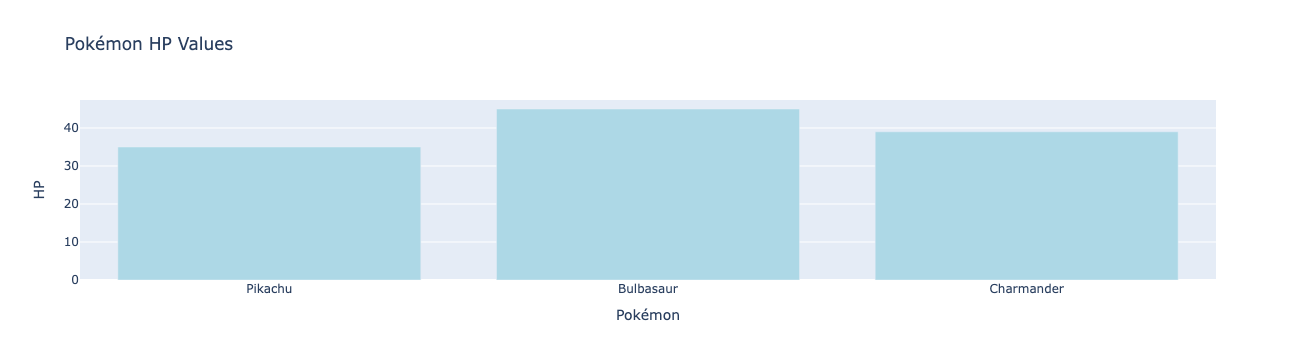

In [23]:
# Import the necessary module from Plotly
import plotly.graph_objects as go

# Data for the bar chart
pokemon_names = ['Pikachu', 'Bulbasaur', 'Charmander']
pokemon_hp = [35, 45, 39]  # HP values for each Pokémon

# Create the bar chart
fig = go.Figure([go.Bar(x=pokemon_names, y=pokemon_hp, marker_color='lightblue')])

# Add titles to the chart
fig.update_layout(
    title="Pokémon HP Values",  # Title of the chart
    xaxis_title="Pokémon",      # Label for the x-axis
    yaxis_title="HP"            # Label for the y-axis
)

# Display the chart
fig.show()

# Group Exercise #5:

Play around with the above code. See if you can do the following:
- change the title of the graph
- change the colors of the graph
- change the type of graph, try replacing `go.Bar()` with `go.Scatter()`, or `go.Pie()`

If you're unsure how to do these, get familiar with the documentation, also I've found that ChatGPT is really helpful when it comes to building visualizations.

In [24]:
# your code here:

# Let's Visualize some Pokemon data with Plotly

Let's use Plotly to create a simple bar chart with pokemon stats:

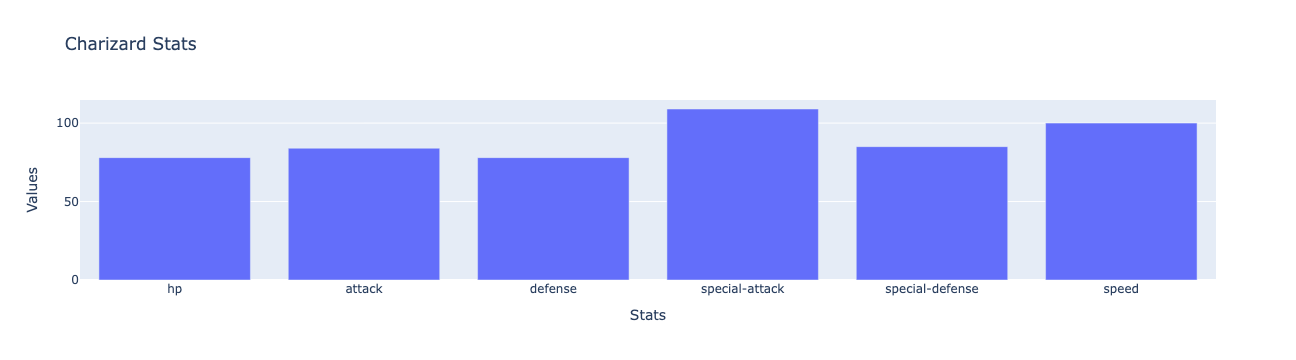

In [26]:
import plotly.graph_objects as go

def plot_pokemon_stats(pokemon_name):
    stats = get_pokemon_stats(pokemon_name)
    if stats:
        fig = go.Figure([go.Bar(x=list(stats.keys()), y=list(stats.values()))])
        fig.update_layout(title=f"{pokemon_name.capitalize()} Stats", xaxis_title="Stats", yaxis_title="Values")
        fig.show()

# Example usage:
plot_pokemon_stats("charizard")

# Let's build an interactive Dashboard with `dash`

Dash is a Python library that helps us to create simple web apps. 

Let's build a simple web app where users can input a Pokemon name and the app will display the Pokemon's stats in a bar chart.

## Step 1: Basic Dash App setup
Create a new file called `app.py` and start by setting up a basic Dash app:

In [ ]:
from dash import Dash, html, dcc
import dash.dependencies as dd
import plotly.graph_objects as go
import requests

# Function to fetch Pokémon data
def get_pokemon_stats(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"
    response = requests.get(url)
    if response.status_code == 200:
        pokemon = response.json()
        return {stat['stat']['name']: stat['base_stat'] for stat in pokemon['stats']}
    return None

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Pokémon Stats Dashboard"),
    dcc.Input(id="pokemon-input", type="text", placeholder="Enter Pokémon name", debounce=True),
    dcc.Graph(id="stats-graph")
])

# Update the graph based on input
@app.callback(
    dd.Output("stats-graph", "figure"),
    [dd.Input("pokemon-input", "value")]
)
def update_graph(pokemon_name):
    if pokemon_name:
        stats = get_pokemon_stats(pokemon_name.lower())
        if stats:
            fig = go.Figure([go.Bar(x=list(stats.keys()), y=list(stats.values()))])
            fig.update_layout(title=f"{pokemon_name.capitalize()} Stats", xaxis_title="Stats", yaxis_title="Values")
            return fig
    return go.Figure()

if __name__ == "__main__":
    app.run_server(debug=True)


## Running the App
Run the app by clicking the run button in VS Code

If you get any `Module not found` errors, make sure you've properly installed both `dash` and `plotly`. 

Open your browser of choice, and go to `http://127.0.0.1:8050/`. Try entering Pokemon names into the input box.

# Group Exercise #6

Try adding a second graph or a table to display the Pokemon's abilities or weight/heigh in addition to the stats:

# Challenges - Advanced Features

Challenges:
- __compare multiple pokemon__: modify the app to allow users to input two Pokemon names an display their stats side by side for comparison
- __dropdown menu for pokemon selection__ replace the text input box with a dropdown menu containing a list of popular pokemon.
- __radar charts__: Try changing the type of plot shown to a radar chart.

Also these challenges provide a great opportunity to use ChatGPT to extend our abilities a little bit. Feel free to play around with giving LLMs like ChatGPT, claude, etc some of these challenges and see if together you can get them to work. 

# Overview:
Today in class you accessed the PokeAPI to fetch data, visualized it using Plotly, and experimented with building  a simple interactive dashboard with Dash. You learned how to:
- Work with APIs and JSON data.
- Create interactive graphs using Plotly.
- Build dynamic web apps using Dash.

# Assignment #4:
[https://analytics.drake.edu/~moore/CS66-F24/Assignment4.html](https://analytics.drake.edu/~moore/CS66-F24/Assignment4.html)

Due next Tuesday, September 24th, 2024, by 11:59 pm.

## You should be working on:
- [Assignment #3](https://analytics.drake.edu/~moore/CS66-F24/Assignment3.html), due Tuesday (9/17) by 11:59 pm
> submit to CodePost
- [Assignment #4](https://analytics.drake.edu/~moore/CS66-F24/Assignment4.html), due Tuesday (9/24) by 11:59